### Salary Predictions Based on Job Descriptions

#### Table of contents

##### Introduction
* Dataset, features and target value
* Define the problem

##### Data quality check
* Libraries import
* Data loading and cleaning

##### Data exploration (EDA)
* Feature distribution
* Correlation matrix
* Features statistical analysis

##### Data pre-processing
* Feature engineering
* Categorical features conversion
* Normalization

##### Model development
* Baseline model creation
* Best model selection, feature importance and final predictions

#### Introduction
**The dataset, features and target value**

The dataset consists of features and target values, given in 2 seperate CSV files.

**Features: descriptions of the posted jobs from different companies**

* jobId: The ID of the job
* companyId: The ID of the company
* jobType: The description of the job
* degree: The degree of the employee
* major: Field of specialization of the employee
* industry: The field to which the company belongs
* yearsExperience: The years of experience the employee has on the job
* milesFromMetropolis: How far the employee lives away from place of work (distance in miles)

**Target variable: the salary each employee earns**

* jobId: The ID of the job
* salary: The amount of salary paid for the job

#### Define the problem

In the current competitive job market, one important factor that a job hunter looks after is the salary. At the same time, companies want to hire the best talent to contribute for them. Making the salary transparent is going to be helpful for both sides.

The goal of this project is to predict salary for different job postings on the given dataset, through exploratory data analysis, identifying the features that affect salary the most, developing a machine learning model will make the prediction with highest accuracy.


__author__= "Shatgul Ogen"
__email__ = "tutiyagogo@gmail.com"

#### Data quality check
**Library import**

In [10]:
#import necessary libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

**Load the data**

In [11]:
#load the data into a Pandas dataframe
original_train_features = pd.read_csv('C:/Users/Shatgul/Desktop/data/train_features.csv')
original_train_salaries = pd.read_csv('C:/Users/Shatgul/Desktop/data/train_salaries.csv')
original_test_features = pd.read_csv('C:/Users/Shatgul/Desktop/data/test_features.csv')

**Clean the data**

In [7]:
#focus on the head of original_train_features
original_train_features.head()
#focus on the head of original_train_salaries
original_train_salaries.head()
#merge dataframes and check the head of the merged dataframe
merged_train_df =pd.merge(original_train_features, original_train_salaries, on= 'jobId', how='inner' )
merged_train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [12]:
#look for missing data from the merged dataframe 
missing_data = merged_train_df.isnull()
for col in missing_data:
    print(col, '\n', missing_data[col].value_counts(), '\n') 

jobId 
 False    1000000
Name: jobId, dtype: int64 

companyId 
 False    1000000
Name: companyId, dtype: int64 

jobType 
 False    1000000
Name: jobType, dtype: int64 

degree 
 False    1000000
Name: degree, dtype: int64 

major 
 False    1000000
Name: major, dtype: int64 

industry 
 False    1000000
Name: industry, dtype: int64 

yearsExperience 
 False    1000000
Name: yearsExperience, dtype: int64 

milesFromMetropolis 
 False    1000000
Name: milesFromMetropolis, dtype: int64 

salary 
 False    1000000
Name: salary, dtype: int64 



In [14]:
#Look for duplicate data from the merged dataframe
merged_train_df.duplicated().value_counts()

False    1000000
dtype: int64

**No any missing data nor any duplicated data in the merged dataframe**

In [15]:
#Look for any invalid data ( e.g. salaries <=0)
merged_train_df[merged_train_df.salary<=0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


**There are 5 rows of data with salary values equals '0'**

In [28]:
#remove these 5 rows with '0' salary values from the merged dataframe
clean_train_df = merged_train_df[merged_train_df.salary>0]
# Double check the cleaned dataframe after the removal of '0' salary rows 
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


**Ater cleaning, we have 999995 rows of data instead of the original 1000000 rows**

### Data exploration (EDA)

In [29]:
# First let us explore the stat on continuous variables in our cleaned dataframe
clean_train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


**There are two numeric variables: 'yearsExperience' & 'milesFromMetropolis'.**
**The one target variable is: 'salary'**

In [30]:
# Second let's look at the categorical variables
clean_train_df.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684827671,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


**There are 999995 job posting, and each one has a unique identifier: 'jobId'.**

**Features distribution**

Text(0.5, 1.0, 'Average salary per industry')

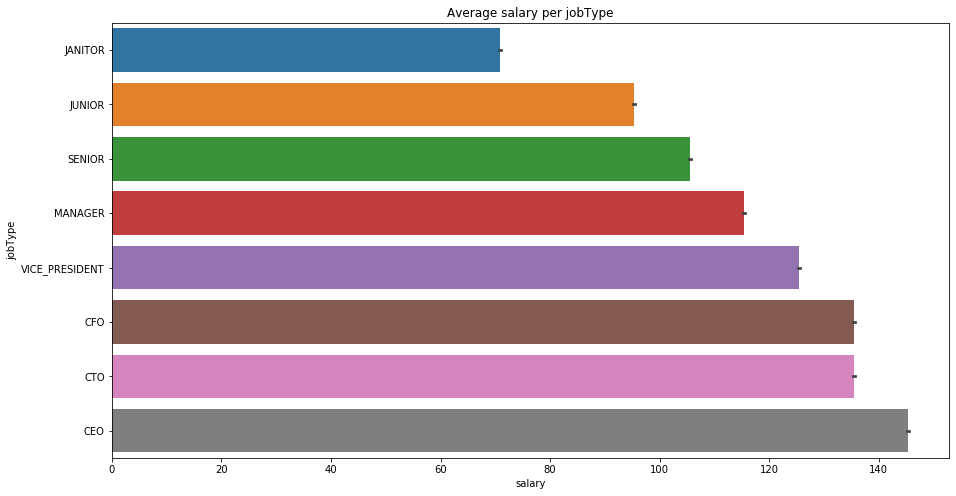

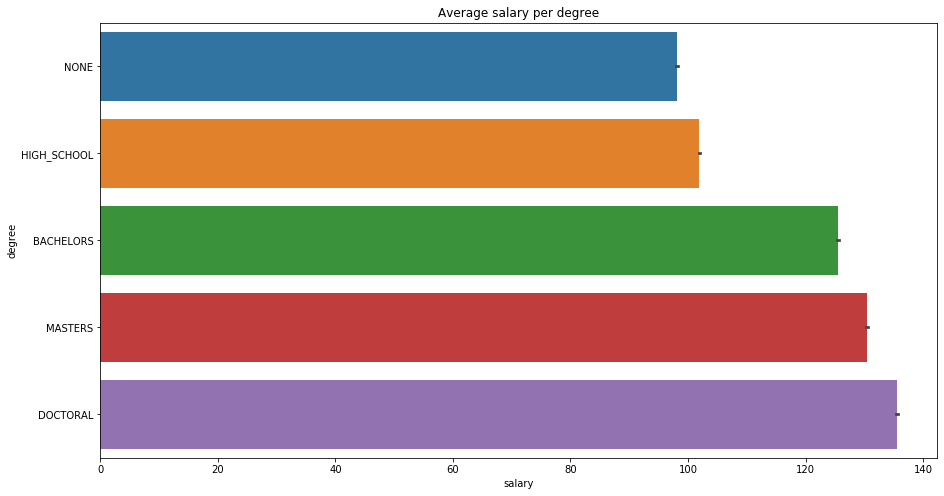

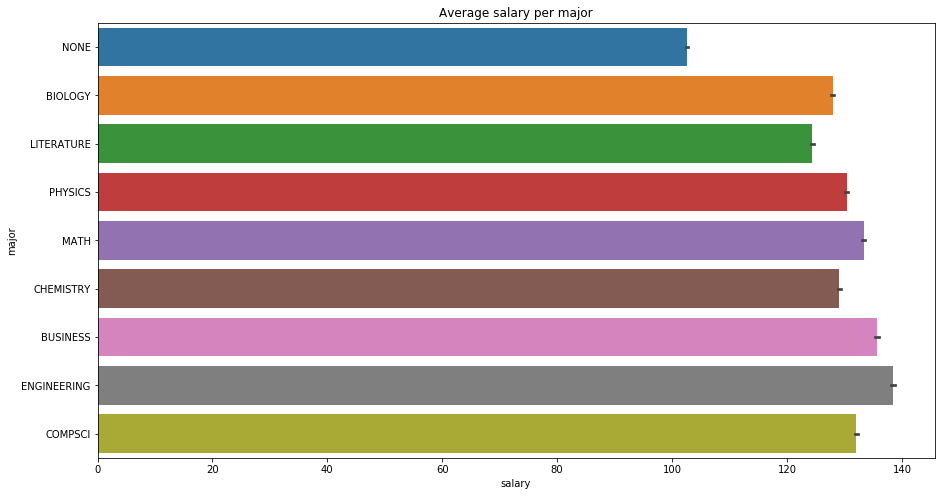

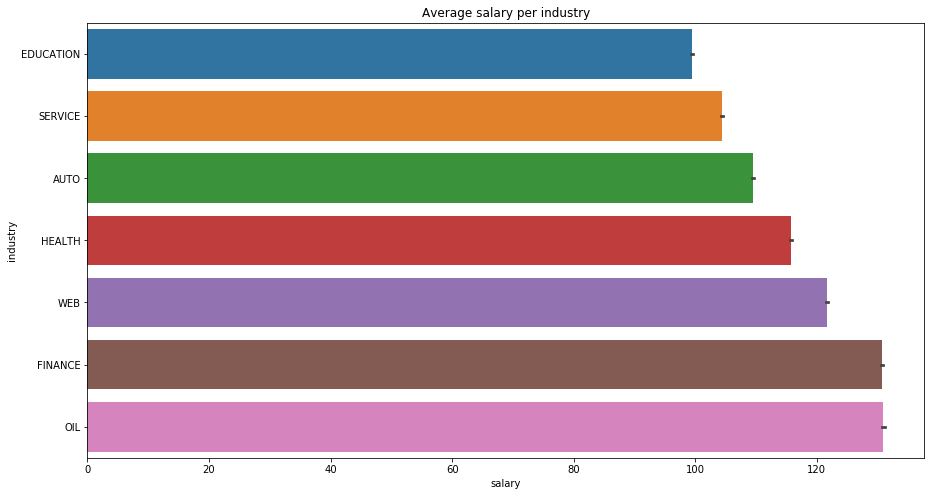

In [86]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="salary", y="jobType", data=clean_train_df.sort_values('salary'))
plt.title('Average salary per jobType')

fig1, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="salary", y="degree", data=clean_train_df.sort_values('salary'))
plt.title('Average salary per degree')
 
fig2, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="salary", y="major", data=clean_train_df.sort_values('salary'))
plt.title('Average salary per major')

fig2, ax = plt.subplots(figsize=(15,8))
sns.barplot(x="salary", y="industry", data=clean_train_df.sort_values('salary'))
plt.title('Average salary per industry')

**Correlation matrix**

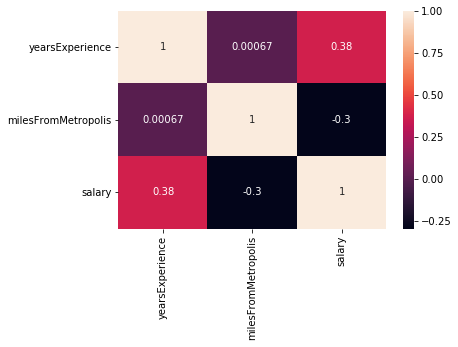

In [58]:
sns.heatmap(clean_train_df.corr(), annot=True)

**Heatmap gives us some useful insights:**
   0.38- Strong positive correlation between salary and years of experience -make sense. 
   -0.3- Negative correlation between salary and miles from metropolis-make sense (In city centers, cost of living would be higher, and so does salary)
    ~0 - There is no correlation between years of experience and miles from metropolis - make sense.

In [59]:
# Remember there are two numeric variables: 'yearsExperience' & 'milesFromMetropolis'
# Now Let us create a plot presenting the relationship between numeric variables vs our target- 'salary'
def plot(numeric_var):
    average = clean_train_df.groupby(numeric_var)['salary'].mean()
    average.plot()
    plt.ylabel('Salary-Target')

Text(0.5, 1.0, 'Salary mean by Years of experience')

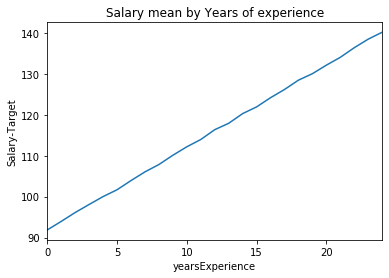

In [60]:
# Graph relation between average salary depending on years of experience
plot('yearsExperience')
plt.title('Salary mean by Years of experience')

Text(0.5, 1.0, 'Salary mean by Miles from Metropolis')

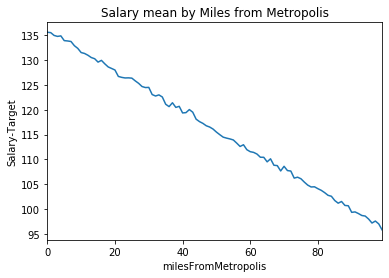

In [61]:
# Graph relation between average salary depending on miles from metropolis
plot('milesFromMetropolis')
plt.title('Salary mean by Miles from Metropolis')

In [58]:
# Now let's focus on the relation between categorical variable and the 'salary' target
def boxenplot(col):
    fig, ax = plt.subplots(figsize=(15,8))
    sns.boxenplot(x=col, y= 'salary', data = clean_train_df.sort_values('salary'))

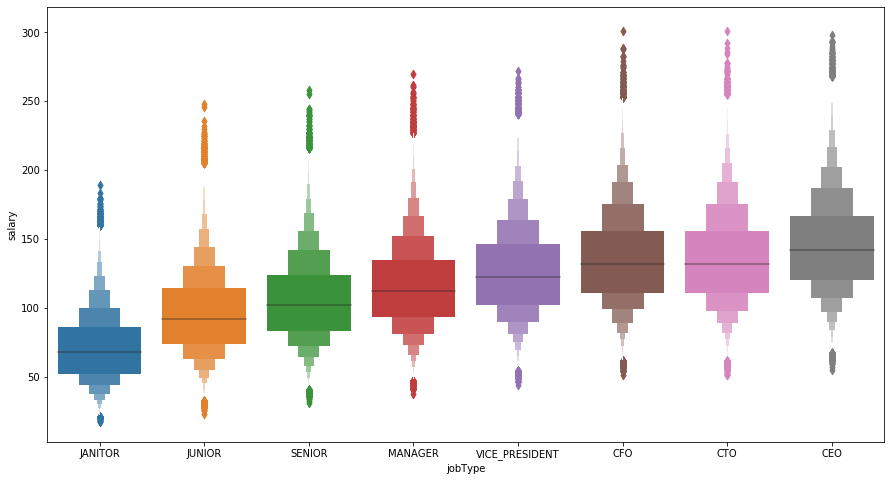

In [59]:
# salaries vs job types
boxenplot('jobType')

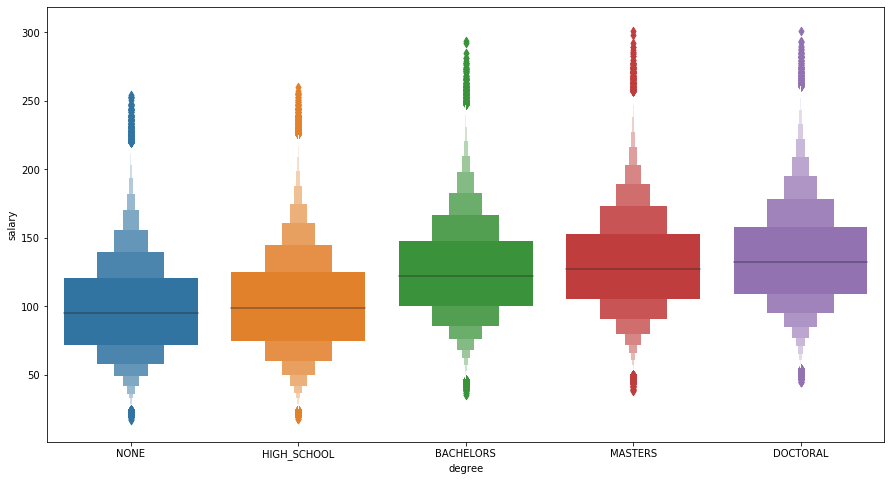

In [60]:
# salaries vs degree
boxenplot('degree')

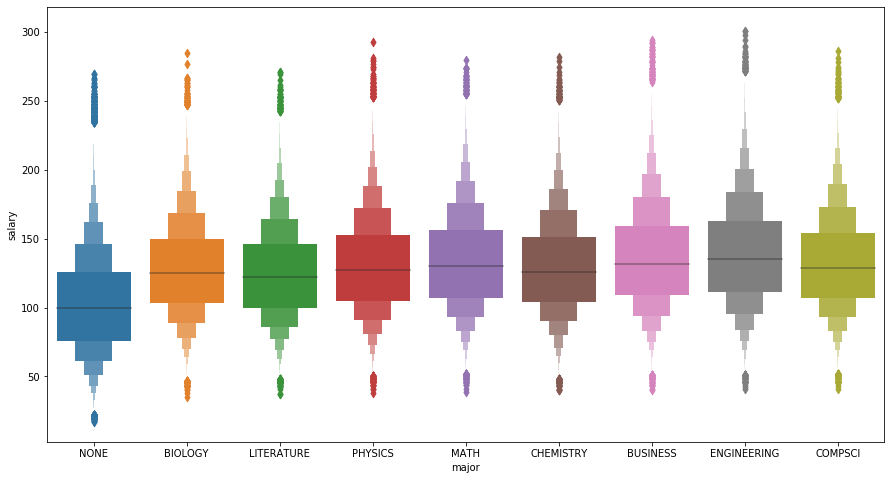

In [61]:
# salaries vs majors
boxenplot('major')

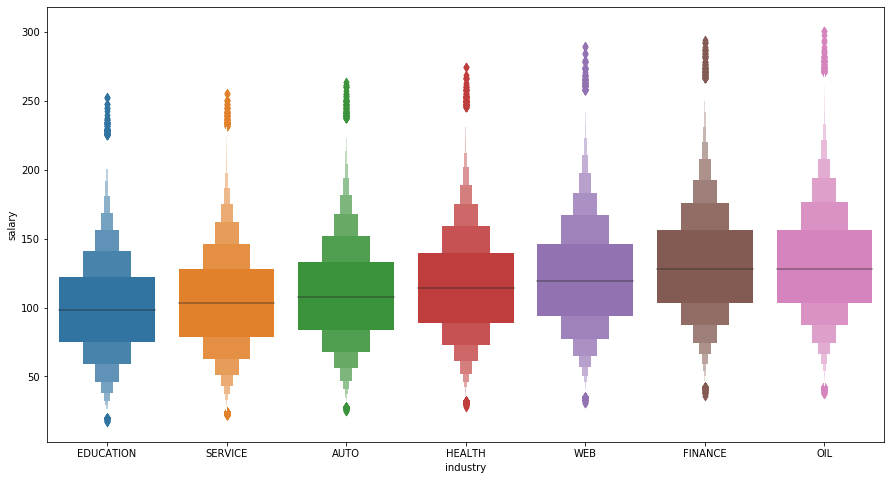

In [62]:
# salaries vs different industries
boxenplot('industry')

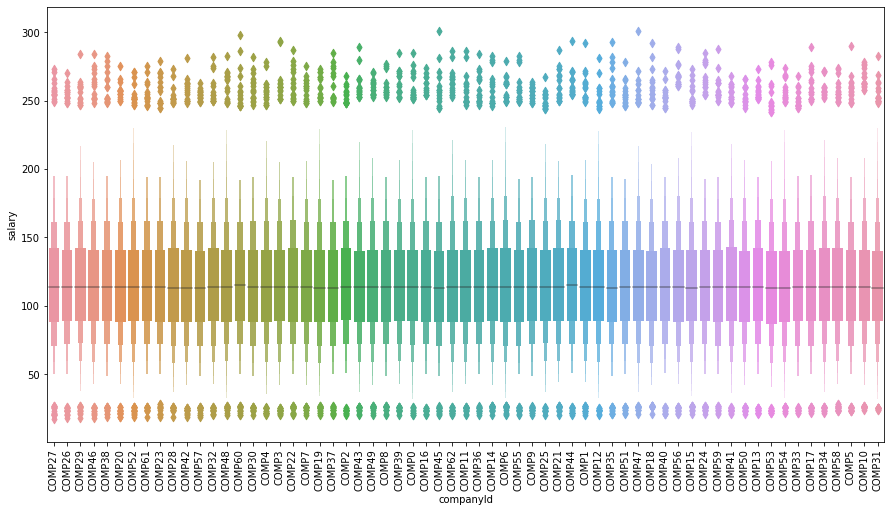

In [66]:
# Salaries across companies
def boxenplot(col):
    f,ax = plt.subplots(figsize=(15,8))
    sns.boxenplot(x=col, y= 'salary', data=clean_train_df.sort_values('salary'))
    plt.xticks(rotation=90)
boxenplot('companyId')

In [87]:
# Now let us focus on the relationship between two variables and the target 'salary', 
#grouped by mean salary of each category
# We will be using heat map 
def heatmap(col1,col2):
    df_gptest = clean_train_df[[col1,col2,'salary']]
    grouped_test1 = df_gptest.groupby([col1,col2],as_index=False).mean()
    grouped_pivot = grouped_test1.pivot(index=col1,columns=col2)
    
    #fill in any missing values with 0
    grouped_pivot = grouped_pivot.fillna(0)
    
    fig, ax = plt.subplots()
    image = ax.pcolor(grouped_pivot, cmap='coolwarm')

    #label names
    row_labels = grouped_pivot.columns.levels[1]
    col_labels = grouped_pivot.index

    #move ticks and labels to the center
    ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
    
    #insert labels
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(col_labels, minor=False)

    #adjustment of long labels
    plt.xticks(rotation=90)
    fig.colorbar(image)

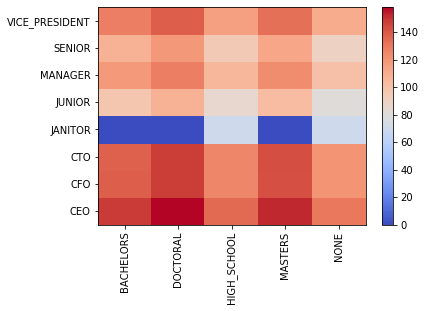

In [88]:
#look for realationship between job type and degree 
heatmap('jobType','degree')

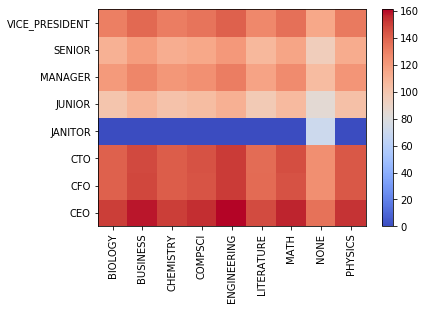

In [89]:
#look for realationship between job type and major
heatmap('jobType','major')

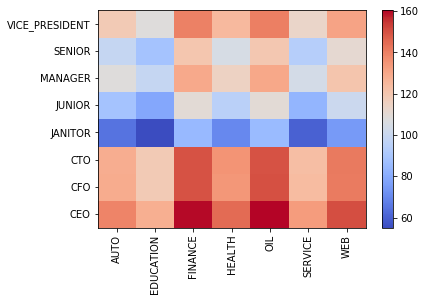

In [90]:
#look for realationship between job type and industry
heatmap('jobType','industry')

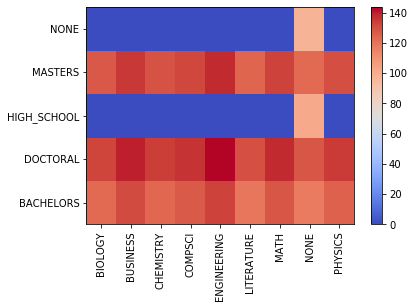

In [91]:
#look for realationship between degree and major
heatmap('degree','major')

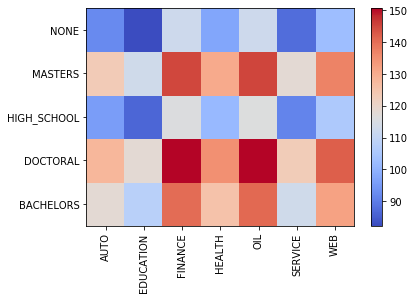

In [92]:
#look for realationship between degree and industry
heatmap('degree','industry')

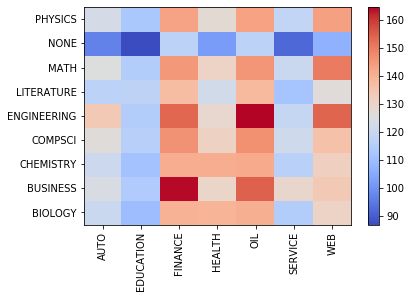

In [93]:
#look for realationship between major and industry
heatmap('major','industry')

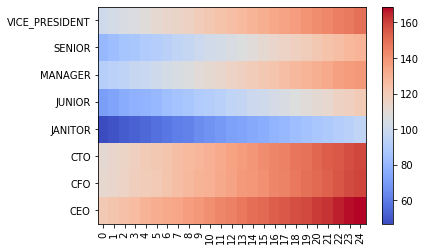

In [94]:
#look for realationship between type of job and years of experience
heatmap('jobType','yearsExperience')

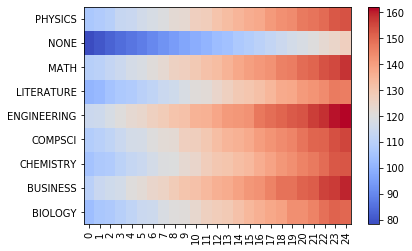

In [95]:
#look for realationship between major and years of experience
heatmap('major','yearsExperience')

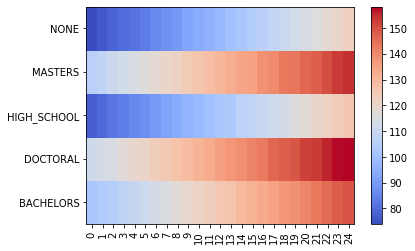

In [96]:
#look for realationship between degree and years of experience
heatmap('degree','yearsExperience')

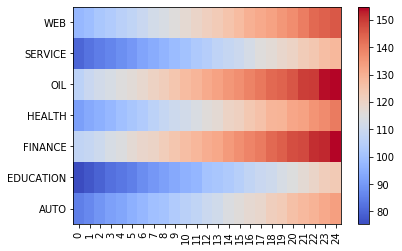

In [97]:
#look for realationship between industry and years of experience
heatmap('industry','yearsExperience')

### Establish a baseline 

In [98]:
# Our goal in this section is to create a column for each job posting(in our cleaned dataframe), with information of average industry salary
# We expect to see the highest salaries in Finance and Oil industries
average_industry_salary = clean_train_df.groupby('industry')['salary'].mean().to_dict()
average_industry_salary

#We need to work on a copy of the original cleaned data and append a new column: 'average industry salary'
copy_of_cleandf = clean_train_df.copy()
copy_of_cleandf['average industry salary'] = ''

#Now use for loop to assign values for the new column created based on our dictionary created previously
#Check the first 20 rows
for index in range(len(copy_of_cleandf)):
    copy_of_cleandf['average industry salary'].values[index]=average_industry_salary[copy_of_cleandf['industry'].values[index]]

In [99]:
#Now let's check out the first 10 row
copy_of_cleandf.head(10)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,average industry salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.736
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,121.645
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.736
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,109.435
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,130.748
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113,130.748
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,115.736
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73,99.4484
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31,99.4484
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104,109.435


In [100]:
# We want to predict the salary and compare our predicted salary with the actual salary
def prediction_graph(test, predict):
    plt.figure(figsize=(30, 8))
    actual_values = sns.distplot(test, hist=False, color="g", label="Actual Salary")
    sns.distplot(predict, hist=False, color="r", label="Predicted Salary" , ax=actual_values)
    plt.title('Predicted Salary vs Actual Salary')
    plt.xlabel('Salary')
    plt.ylabel('Proportion of job postings')

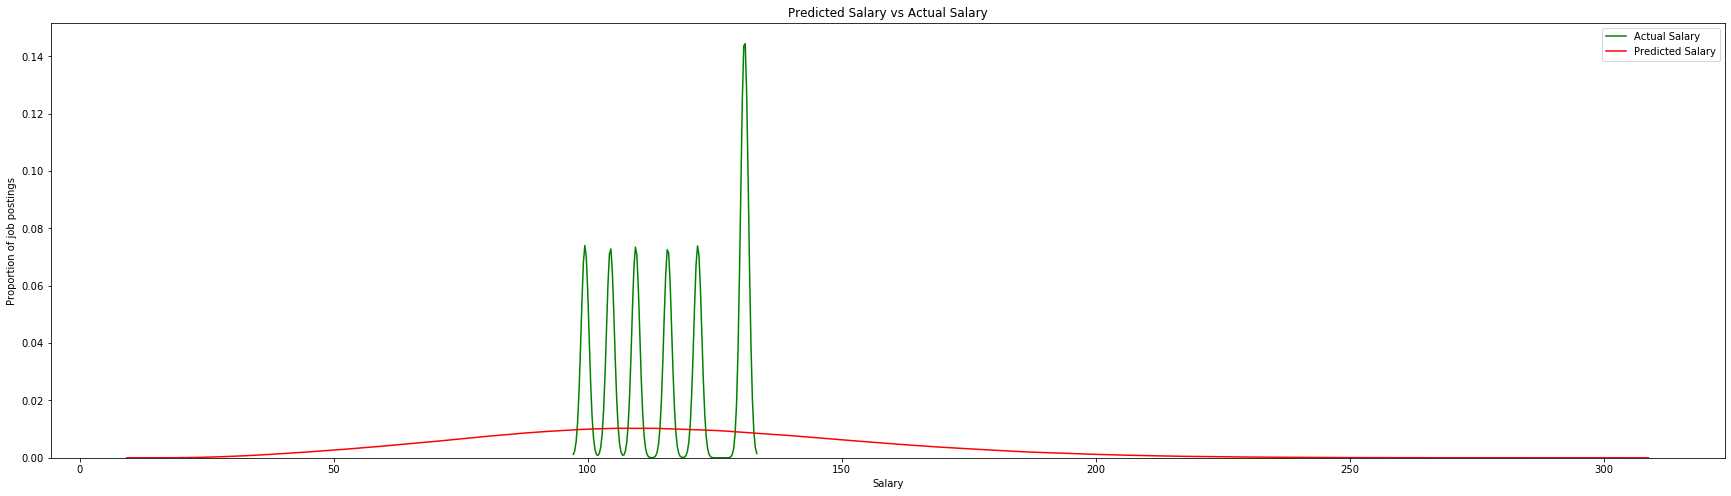

In [101]:
prediction_graph(copy_of_cleandf['average industry salary'], clean_train_df['salary'])

Remember the average salary in Oil and Finance industry is about the same ~130K, that is represented in the highest peak in this prediction graph. There are 7 different industries. This graph presents the actual and predicted average salaries among these different industries. Each peak in the graph represents 1/7 industries in the data set except the last peak, which represents the Oil and Finance industries with similar average salaries.

In [102]:
#Let's measure the efficacy of our simple model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#5-fold cross-validation: splitting train data in 5 sub training sets
kfold = KFold(5,True,1)
kfold

#Let's measure Mean Squared Error during 5-fold cross-validation
MSE = []
for train,test in kfold.split(copy_of_cleandf):
    MSE_values = mean_squared_error(copy_of_cleandf['salary'].values[train],copy_of_cleandf['average industry salary'].values[train])
    print(MSE_values)
    MSE.append(MSE_values)
print('average_MSE :',np.mean(MSE))

1365.3357035910158
1366.4050593022566
1368.266668546412
1367.6215688859554
1367.985753600638
average_MSE : 1367.1229507852556


### Hypothesize solution

There are 3 models that I think may improve results over the baseline model based on my EAD and my reasoning: 1. Multiple Linear Regression: There is a linear relationship we observed through EAD, between 2 numeric variables and target salary. 2. Stochastic Gradient Descent Regressor: The large count of Jobpostings is close to 100K in the training set after cleaning the dataset. 3. Random Forest Common method which provides high accuracy for regression tasks with large dataset.

## DEVELOP

### Engineer features

In [103]:
#First we need to make sure that our data is ready for modeling
#encode variables, get dummies for categorical variables and concatenate with the numeric variables
def encode(df):
    categorical_feat = ['jobType','degree','major','industry']
    numeric_feat = df[['yearsExperience','milesFromMetropolis']]
    
    cat_var = pd.get_dummies(df[categorical_feat])
        
    df.drop(categorical_feat,axis=1,inplace=True)
    return pd.concat([cat_var,numeric_feat],axis=1)

#get features and the target
myfeatures = encode(copy_of_cleandf)
mytarget = clean_train_df['salary']

In [104]:
from sklearn.model_selection import cross_val_score
#calculate mse during 5-fold cross-validation
def mse(model):
    average_mse = -1.00*cross_val_score(model,myfeatures, mytarget,cv=5,scoring='neg_mean_squared_error')
    print('MSE:',np.mean(average_mse))

In [105]:
from sklearn.model_selection import train_test_split

#split the data set into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(myfeatures, mytarget, test_size=0.25,random_state=42)

### Create models 
### First Model: Multiple Linear Regression

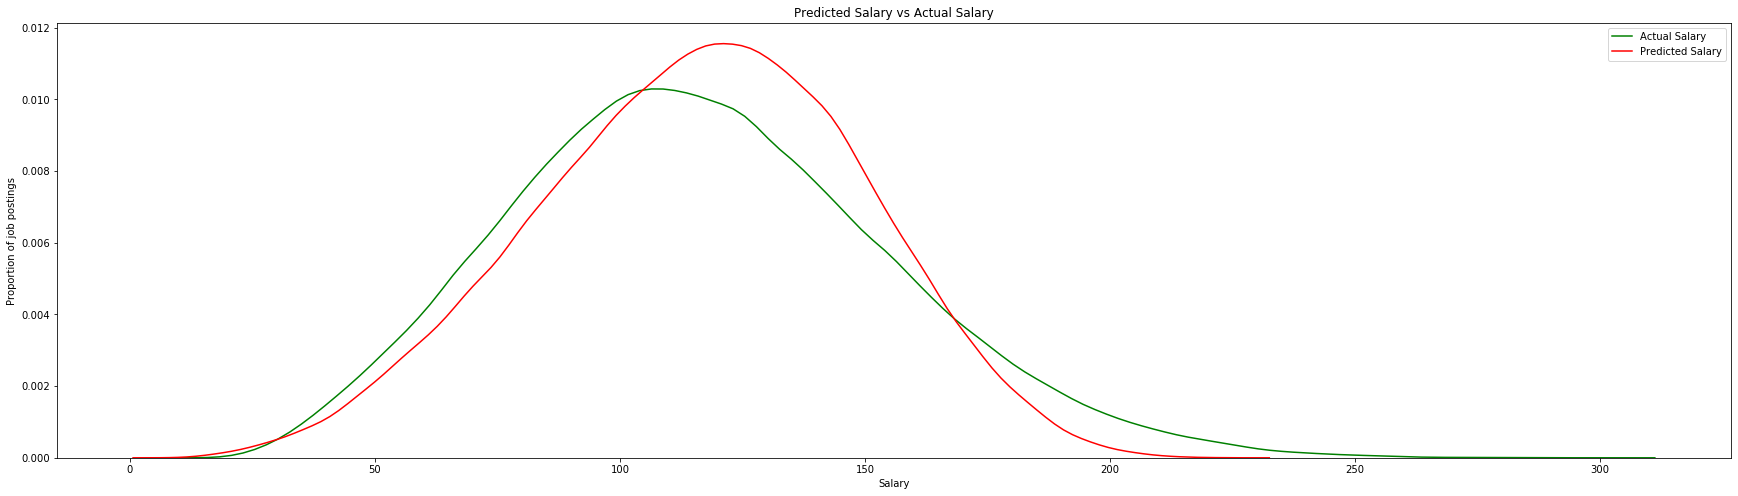

In [106]:
from sklearn.linear_model import LinearRegression
MLR_model = LinearRegression()
MLR_model
MLR_model.fit(x_train,y_train)
Predicted_values = MLR_model.predict(x_test)
prediction_graph(y_test, Predicted_values)

### Second Model: Stochastic Gradient Descent Regressor (in progress)

### Third Model:Random Forest (in progress)

### Test models 

In [109]:
#5-fold cross validation on 1st model and measure MSE
mse(MLR_model)
#5-fold cross validation on 2nd model and measure MSE

#5-fold cross validation on 3rd model and measure MSE

MSE: 384.4354775789917


### Select best model 

In [110]:
#select the model with the lowest error as "prodcuction" model

## DEPLOYMENT

### Automate pipeline 

In [111]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### Deploy solution 

In [112]:
#save prediction to a csv file or as a table in a SQL database
#save a visualization and summary of your prediction and feature importances

### ---- 13 Measure efficacy ----

**I don't have the outcomes for the test data, so I'll skip this step in the current project**